Liam Brown  
lpb7  
3/27/23

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

## Part 1 ##

**Import both data sets into their own data frame**

In [2]:
df_movement = pd.read_csv('robots_movement.csv')

In [3]:
df_movement.head()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
0,0,0,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,-2.198206,-0.024668,1.396664
1,0,1,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128,-2.198203,-0.024662,1.396646
2,0,2,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,-2.198178,-0.024728,1.396682
3,0,3,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,-2.198146,-0.024770,1.396721
4,0,4,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,-2.198135,-0.024784,1.396693


In [4]:
df_movement.shape

(462080, 11)

In [5]:
df_surface = pd.read_csv("robots_surface.csv")

In [6]:
df_surface.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [7]:
df_surface.shape

(3610, 3)

**How many types of surfaces are there? What are the different types? What is the distribution of
the different surface types? What do you notice about the distribution?**

In [8]:
df_surface["surface"].nunique()

9

In [9]:
df_surface["surface"].value_counts()

concrete                  731
soft_pvc                  701
wood                      569
tiled                     482
fine_concrete             338
soft_tiles                297
hard_tiles_large_space    291
carpet                    180
hard_tiles                 21
Name: surface, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'fine_concrete'),
  Text(1, 0, 'concrete'),
  Text(2, 0, 'soft_tiles'),
  Text(3, 0, 'tiled'),
  Text(4, 0, 'soft_pvc'),
  Text(5, 0, 'hard_tiles_large_space'),
  Text(6, 0, 'carpet'),
  Text(7, 0, 'hard_tiles'),
  Text(8, 0, 'wood')])

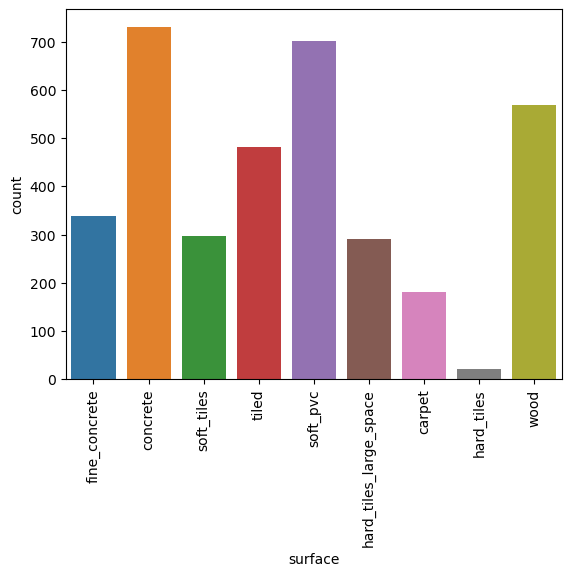

In [10]:
sns.countplot(x=df_surface["surface"])
plt.xticks(rotation=90)

> There are 9 different surfaces. They are fine concrete, concrete, soft tiles, tiled, soft pvc, hard tiles with a large space, carpet, hard tiles, and wood.The distribution can be seen above. Hard tile has the least amount of instances at 21 and concrete the most at 731. There is a large difference in the number of instances for the different surface types.  

**Look at the input features. What is the correlation between the input features? What do you notice about the correlation between them?**

In [11]:
df_movement.corr()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
series_id,1.000000e+00,-8.734501e-15,-0.001615,-0.016431,0.025301,-0.001471,-0.009625,-0.002085,0.227099,0.163510,-0.124005
measurement_number,-8.734501e-15,1.000000e+00,0.000027,0.000928,0.000734,-0.001261,-0.002878,-0.001120,0.000082,0.000849,0.001079
angular_velocity_X,-1.615322e-03,2.747425e-05,1.000000,-0.086944,-0.016229,-0.002689,-0.019163,-0.034380,0.000211,0.003324,0.001793
angular_velocity_Y,-1.643120e-02,9.282848e-04,-0.086944,1.000000,-0.761548,-0.027420,0.015876,0.004486,0.012836,0.072765,0.048793
angular_velocity_Z,2.530089e-02,7.344228e-04,-0.016229,-0.761548,1.000000,0.028835,-0.000265,-0.001156,-0.015318,-0.093674,-0.061721
linear_acceleration_X,-1.470736e-03,-1.261212e-03,-0.002689,-0.027420,0.028835,1.000000,0.058408,0.018986,-0.003630,-0.125987,-0.003926
linear_acceleration_Y,-9.625287e-03,-2.878139e-03,-0.019163,0.015876,-0.000265,0.058408,1.000000,0.377997,0.010333,0.010435,0.001984
linear_acceleration_Z,-2.084959e-03,-1.119746e-03,-0.034380,0.004486,-0.001156,0.018986,0.377997,1.000000,0.002116,0.001203,0.000268
direction_X,2.270992e-01,8.157034e-05,0.000211,0.012836,-0.015318,-0.003630,0.010333,0.002116,1.000000,0.143814,-0.019280
direction_Y,1.635098e-01,8.485409e-04,0.003324,0.072765,-0.093674,-0.125987,0.010435,0.001203,0.143814,1.000000,-0.097700


<AxesSubplot:>

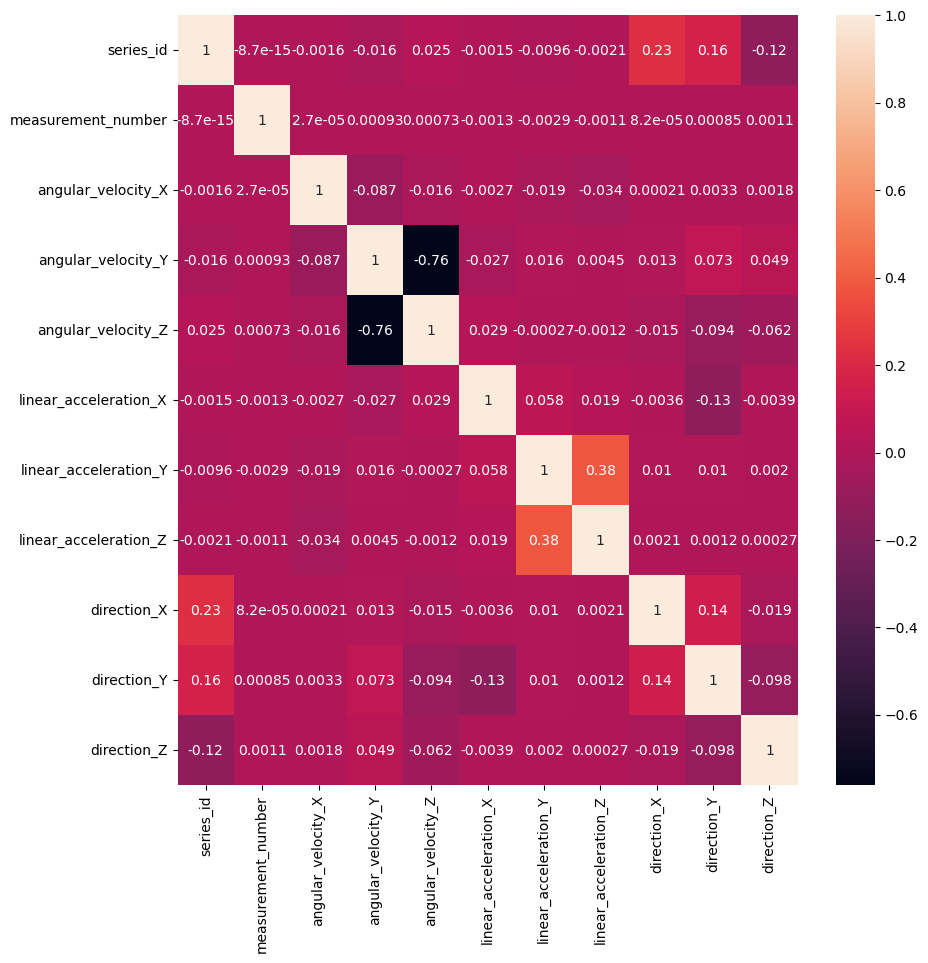

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_movement.corr(),annot=True)

> There is not a lot of correlation between the features. The features that are correlated are the angualr velocity in the y and z direction and the linear acceleration in the y and z directions are also somewhat correlated. Both of these make sense as they are closely related. Outside of these two pairs of features, there is not a high correlation between the features. 

**For the first experiment (the one with a series ID of 0), plot each of the features versus time (i.e.,measurement number). What do you notice, if anything?**

In [13]:
df_movement_1 = df_movement[df_movement["series_id"]==0]
df_movement_1

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
0,0,0,0.107650,0.017561,0.000767,-0.74857,2.10300,-9.7532,-2.198206,-0.024668,1.396664
1,0,1,0.067851,0.029939,0.003386,0.33995,1.50640,-9.4128,-2.198203,-0.024662,1.396646
2,0,2,0.007275,0.028934,-0.005978,-0.26429,1.59220,-8.7267,-2.198178,-0.024728,1.396682
3,0,3,-0.013053,0.019448,-0.008974,0.42684,1.09930,-10.0960,-2.198146,-0.024770,1.396721
4,0,4,0.005135,0.007652,0.005245,-0.50969,1.46890,-10.4410,-2.198135,-0.024784,1.396693
...,...,...,...,...,...,...,...,...,...,...,...
123,0,123,0.041741,0.012857,0.016053,-0.80827,1.79890,-6.8687,-2.199563,-0.023822,1.393525
124,0,124,-0.052041,-0.014752,0.021632,-0.36055,2.35620,-6.8926,-2.199590,-0.023802,1.393462
125,0,125,-0.083083,-0.044480,0.031726,-0.98193,0.97328,-9.9795,-2.199714,-0.023639,1.393336
126,0,126,-0.001305,-0.031012,0.017241,-0.72591,0.34931,-11.9770,-2.199758,-0.023562,1.393271


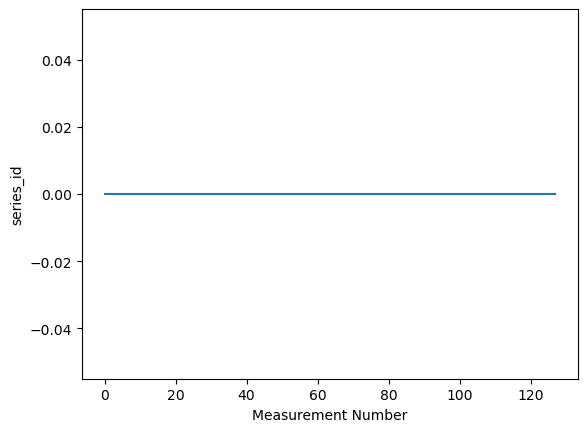

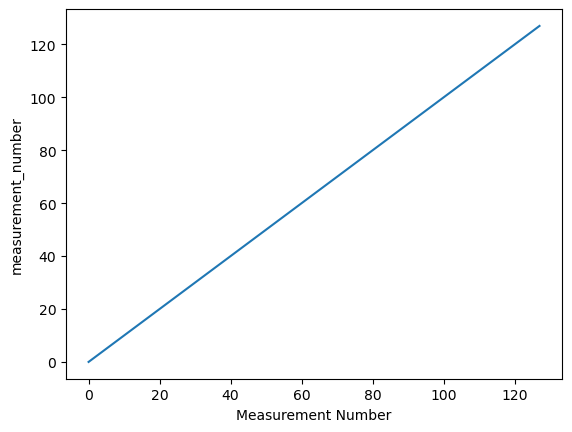

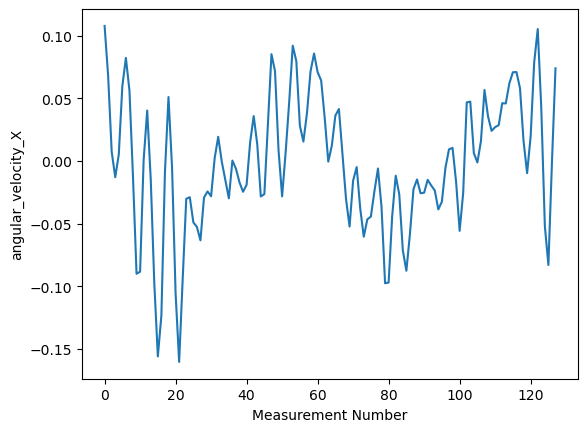

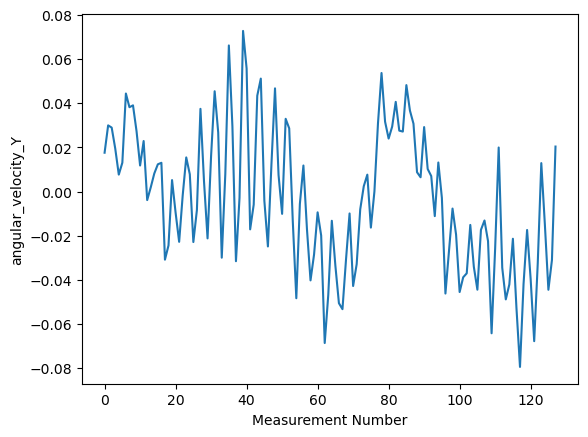

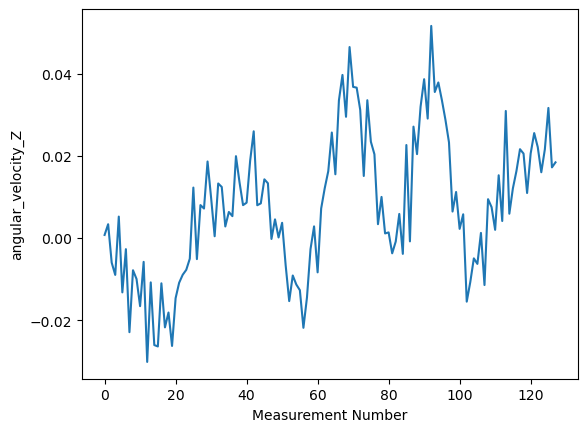

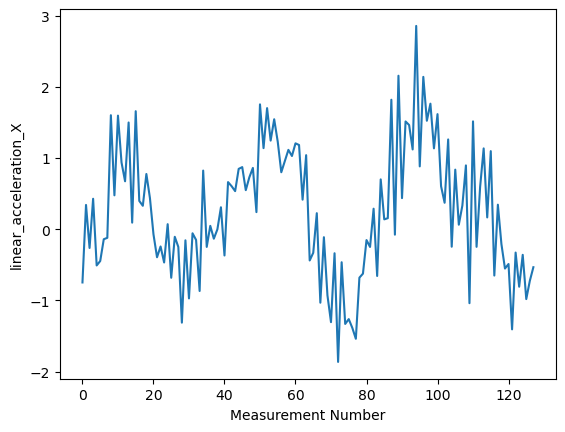

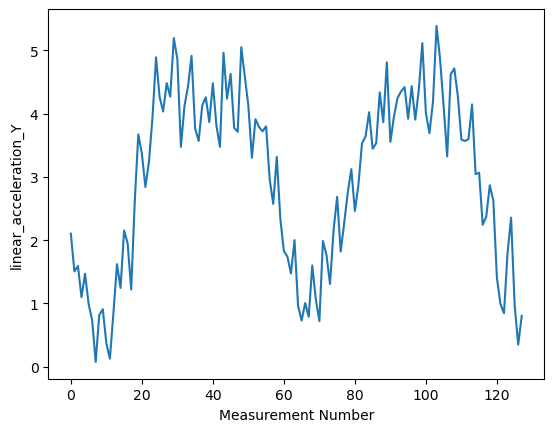

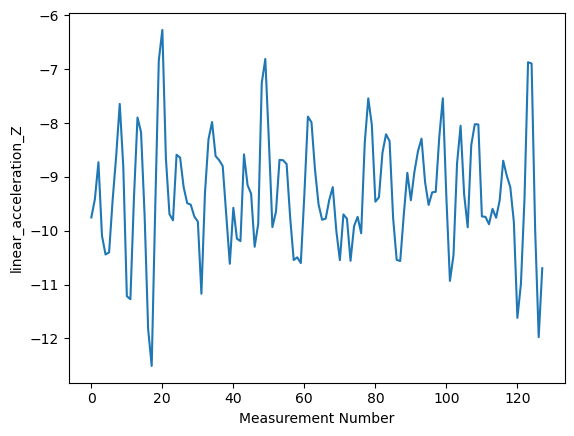

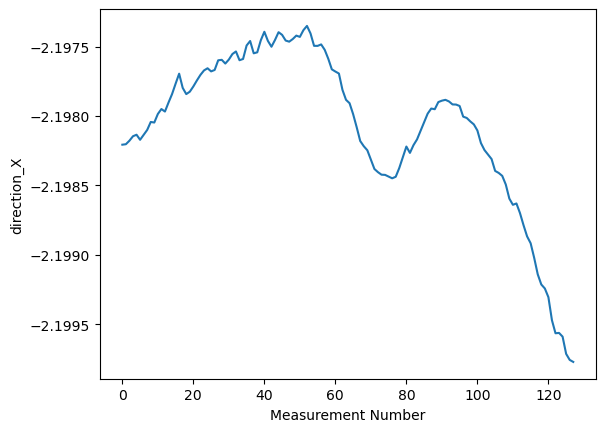

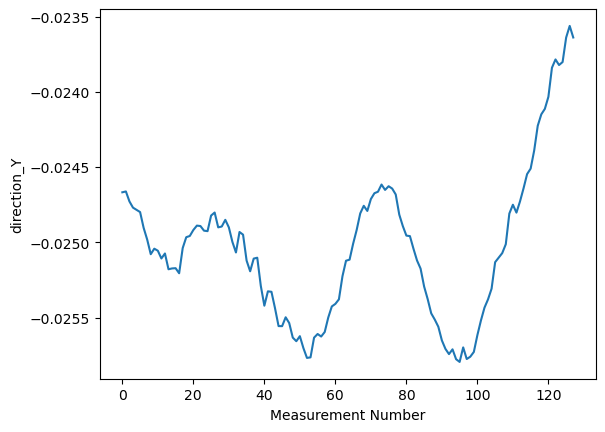

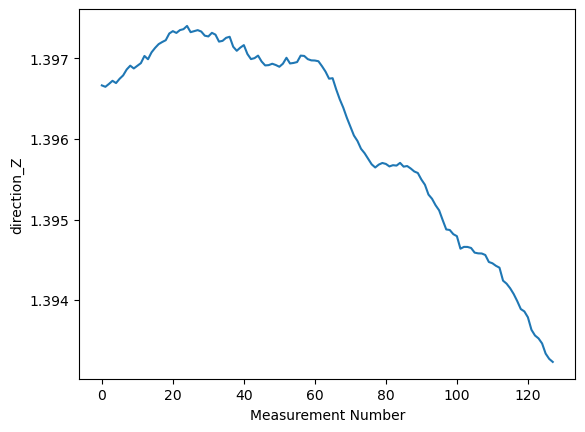

In [14]:
col_names=list(df_movement_1.columns)

j=0
for i in df_movement_1.columns:
    plt.figure()
    plt.plot(df_movement_1["measurement_number"],df_movement_1[i])
    plt.xlabel('Measurement Number')
    plt.ylabel(col_names[j])
    j+=1

> I notice that the features appear to be noisy and change a lot throughout the experiment. The x,y,z direction have the least noise of the features. 

## Part 2 ##

**Create a new data frame in which you use the groupby function on the series ID using the mean. What is the shape of this new data frame? (Hint: it should be 3,610, exactly the number of experiments performed).**

In [15]:
df_movement_mean = df_movement.groupby(df_movement['series_id'],as_index=False).mean()

In [16]:
df_movement_mean.head()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
0,0,63.5,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391,-2.198082,-0.025037,1.396035
1,1,63.5,0.004605,-0.007757,0.006206,0.121867,2.768193,-9.388899,2.426853,-0.010369,-0.492731
2,2,63.5,0.002646,-0.009232,0.027989,0.149711,2.886745,-9.395783,-2.041776,-0.012195,2.055021
3,3,63.5,0.000624,-0.002804,0.007887,0.201791,2.657922,-9.451164,2.351483,-0.015107,-0.635656
4,4,63.5,0.006969,0.046109,-0.142385,-0.086171,2.981498,-9.349988,2.235396,-0.009793,-0.894147


In [17]:
df_movement_mean.shape

(3610, 11)

**Assign all of the input features to x, making sure to drop the useless predictor (which one is that?).**

In [18]:
x = df_movement_mean.drop(["measurement_number","series_id"],axis=1)

**Label encode your surface types and assign them to y.**

In [19]:
surfaces = df_surface["surface"].unique()

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(surfaces)
df_surface['surface_id'] = le.transform(df_surface['surface'].tolist())
y = df_surface['surface_id']

**Split your data into training and test sets, scale it, and train a logistic regression model (use a max_iter of 500 to ensure convergence). How does this model perform? Use accuracy and a confusion matrix to justify your thoughts.**

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
LogReg1 = LogisticRegression(max_iter=500)
LogReg1 = LogReg1.fit(x_train_scaled, y_train)

print(LogReg1.score(x_train_scaled, y_train))

y_pred_LogReg1 = LogReg1.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_LogReg1))
print(metrics.confusion_matrix(y_test, y_pred_LogReg1))

0.3268698060941828
0.30193905817174516
[[  5  37   0   0   0   4   0   2  16]
 [  0 125   0   0   0  63   2   8  17]
 [  1  50   0   0   0  22   2   5  28]
 [  0   0   0   0   0   5   0   0   1]
 [  1  29   0   0   0  46   1   2  16]
 [  1  66   0   0   0 106   2  13  11]
 [  0  46   0   0   0  26   2   1   1]
 [  0  57   0   0   1  61   0  13  14]
 [  5  55   0   0   0  35   0   3  76]]


> This model performs very poorly with an accuracy of only 30.1%. Even on the training data, the model score is only 32.6%.

**Train a k-nearest neighbors classifier using 2 nearest neighbors. How does this model perform?**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=2)
knn1 = knn1.fit(x_train_scaled,y_train)

print(knn1.score(x_train_scaled, y_train))

y_pred_knn1 = knn1.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_knn1))
print(metrics.confusion_matrix(y_test, y_pred_knn1))

0.7882865057380293
0.5078485687903971
[[ 34  15   2   0   4   1   1   3   4]
 [ 29 126  11   1   8  18   5  10   7]
 [  6  16  55   0   8  14   5   0   4]
 [  0   0   2   2   0   0   1   0   1]
 [  4  17   4   1  45  10  12   1   1]
 [  8  32  14   2  13 115   2   9   4]
 [  0   8   1   0   4  15  45   2   1]
 [  9  38   8   1   2  27   8  52   1]
 [ 16  30  13   1   9  23   3   3  76]]


D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

> The model performs better than the logistic regression model with an accuracy of 50.7%. The model score was significantly higher at 78.8 %. This is likely the result of overfitting. 

**Use a GridSearchCV procedure to find the optimum number of nearest neighbors and the best
distance metric (Euclidean or Manhattan) hyperparameters for the k-nearest neighbors. Use 10-
fold cross validation.**

In [25]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[2,3,4,5,6,7,8,9,10],
    "metric":['euclidean','manhattan']
    
}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,cv=10,n_jobs=4)
gs_results = gs.fit(x_train_scaled,y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.6078565154652111
{'metric': 'manhattan', 'n_neighbors': 5}
KNeighborsClassifier(metric='manhattan')


**What are the best parameters? Does this improve the performance of the model? Why? What does
GridSearchCV do? What is cross validation and why did we do it?**

>The best parameters are using manhattan distance metric and 5 neighbors because it yields the best score. GridsearchCV finds the optimal parameters from the provided list of parameters to see which will give the best score. Cross validation divides the data into different groups to make sure that the parameters are applicable to different combinations of the data and it is not overfit to only one set of data. 

**Retrain a k-nearest neighbors classifier on your original training and test data using the optimal
hyperparameters. Does your model improve?**

In [26]:
knn2 = KNeighborsClassifier(metric='manhattan', n_neighbors=5)
knn2 = knn2.fit(x_train_scaled,y_train)

print(knn2.score(x_train_scaled, y_train))

y_pred_knn2 = knn2.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_knn2))
print(metrics.confusion_matrix(y_test, y_pred_knn2))

0.7471309853581322
0.6094182825484764
[[ 24  18   3   0   2   2   2   3  10]
 [  7 132   5   0   6  26  13  11  15]
 [  4  13  59   0   3   9   9   3   8]
 [  0   0   1   1   0   1   2   0   1]
 [  1  13   3   0  45  14  13   2   4]
 [  4  16   6   0   3 154   5   5   6]
 [  0   1   1   0   0   9  61   2   2]
 [  4  19   6   0   0  30   9  74   4]
 [  7  23   5   0   2  21   4   2 110]]


D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

>The model accuracy increased from 50.7% to 60.9% so there was an increase in model performance. 

**Train a random forest classifier on this data, using 800 decision trees. How does this model
perform? Compare the accuracy score for the training data and on the test data; what do you notice?**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=800)

rf1.fit(x_train_scaled, y_train)

print(rf1.score(x_train_scaled, y_train))

y_pred_rf1 = rf1.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf1))
print(metrics.confusion_matrix(y_test, y_pred_rf1, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8]))

1.0
0.7867036011080333
[[ 39   8   1   0   0   0   1   8   7]
 [  1 167   3   0   1  13   5   6  19]
 [  1   7  85   0   0   3   4   2   6]
 [  0   1   0   1   1   0   0   0   3]
 [  0   7   2   0  60   8   6   3   9]
 [  0  10   0   0   1 173   1   7   7]
 [  0   3   1   0   0   3  61   5   3]
 [  3   5   1   0   0   9   0 121   7]
 [  2   8   3   0   3  12   0   1 145]]


> This model had an accuracy of 78.6%. The model score for the training data was 1.0. This means that the model was likely overfit. 

**From the confusion matrix, what are the two most common misclassified surfaces and what
are they misclassified as?**

In [28]:
print(metrics.classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72        64
           1       0.78      0.78      0.78       215
           2       0.89      0.79      0.84       108
           3       0.67      0.33      0.44         6
           4       0.94      0.61      0.74        95
           5       0.77      0.86      0.82       199
           6       0.79      0.79      0.79        76
           7       0.78      0.83      0.80       146
           8       0.70      0.84      0.76       174

    accuracy                           0.78      1083
   macro avg       0.80      0.72      0.74      1083
weighted avg       0.79      0.78      0.78      1083



In [29]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8])

array(['carpet', 'concrete', 'fine_concrete', 'hard_tiles',
       'hard_tiles_large_space', 'soft_pvc', 'soft_tiles', 'tiled',
       'wood'], dtype=object)

> The two most common misclassified surfaces are wood and concrete. 19 of the concrete instances were identified as wood. There were 13 concrete predicted as soft pvc. 

## Part 3 ##

Create a blank data frame.

In [30]:
df_new = pd.DataFrame()

Write a Python for loop which loops over every column in your input features dataframe, computes
the mean, minimum, maximum, and standard deviation of each series, and assigns it to the new
data frame.

In [31]:
for col in df_movement.columns:
    df_new[col + '_mean'] = df_movement.groupby(['series_id'])[col].mean()
    df_new[col + '_min'] = df_movement.groupby(['series_id'])[col].min()
    df_new[col + '_max'] = df_movement.groupby(['series_id'])[col].max()
    df_new[col + '_std'] = df_movement.groupby(['series_id'])[col].std()

In [32]:
df_new

,series_id_mean,series_id_min,series_id_max,series_id_std,measurement_number_mean,measurement_number_min,measurement_number_max,measurement_number_std,angular_velocity_X_mean,angular_velocity_X_min,...,direction_X_max,direction_X_std,direction_Y_mean,direction_Y_min,direction_Y_max,direction_Y_std,direction_Z_mean,direction_Z_min,direction_Z_max,direction_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,0.0,63.5,0,127,37.094474,-0.002481,-0.160410,...,-2.197350,0.000574,-0.025037,-0.025795,-0.023562,0.000503,1.396035,1.393233,1.397402,0.001221
1,1.0,1,1,0.0,63.5,0,127,37.094474,0.004605,-0.254800,...,2.429841,0.001387,-0.010369,-0.012073,-0.009109,0.000822,-0.492731,-0.494641,-0.490164,0.001131
2,2.0,2,2,0.0,63.5,0,127,37.094474,0.002646,-0.152710,...,-2.040610,0.000668,-0.012195,-0.012734,-0.011795,0.000173,2.055021,2.049684,2.061288,0.003219
3,3.0,3,3,0.0,63.5,0,127,37.094474,0.000624,-0.401520,...,2.356419,0.002101,-0.015107,-0.015698,-0.014645,0.000234,-0.635656,-0.638340,-0.634294,0.000931
4,4.0,4,4,0.0,63.5,0,127,37.094474,0.006969,-0.104070,...,2.245355,0.005080,-0.009793,-0.010192,-0.009358,0.000241,-0.894147,-0.915040,-0.867983,0.013836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,3605.0,3605,3605,0.0,63.5,0,127,37.094474,-0.003795,-0.704460,...,1.982653,0.000667,-0.014402,-0.016808,-0.012843,0.000992,-2.457882,-2.474120,-2.438998,0.010796
3606,3606.0,3606,3606,0.0,63.5,0,127,37.094474,-0.001424,-0.352810,...,-2.117368,0.002013,-0.010691,-0.012164,-0.008644,0.000996,1.662319,1.649609,1.674206,0.007508
3607,3607.0,3607,3607,0.0,63.5,0,127,37.094474,0.005469,-0.110600,...,1.986301,0.000242,-0.015079,-0.016361,-0.014219,0.000736,-2.406638,-2.410640,-2.400072,0.003179


**How many observations does this new data frame have? (Hint: it should be 3,610, exactly the
number of experiments performed).**

In [33]:
df_new.shape

(3610, 44)

**After running this code, there are some features you need to drop. What are they?**

> The features that need to be dropped are the ones for series id and measurement number. 

In [37]:
x_new = df_new.drop(["series_id_mean","series_id_min","series_id_max","series_id_std","measurement_number_mean","measurement_number_min","measurement_number_max","measurement_number_std"],axis=1)

In [38]:
x_new

,angular_velocity_X_mean,angular_velocity_X_min,angular_velocity_X_max,angular_velocity_X_std,angular_velocity_Y_mean,angular_velocity_Y_min,angular_velocity_Y_max,angular_velocity_Y_std,angular_velocity_Z_mean,angular_velocity_Z_min,...,direction_X_max,direction_X_std,direction_Y_mean,direction_Y_min,direction_Y_max,direction_Y_std,direction_Z_mean,direction_Z_min,direction_Z_max,direction_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,-0.002481,-0.160410,0.107650,0.052800,-0.003306,-0.079404,0.072698,0.031544,0.007532,-0.030181,...,-2.197350,0.000574,-0.025037,-0.025795,-0.023562,0.000503,1.396035,1.393233,1.397402,0.001221
1,0.004605,-0.254800,0.283420,0.092309,-0.007757,-0.134330,0.112080,0.046523,0.006206,-0.121610,...,2.429841,0.001387,-0.010369,-0.012073,-0.009109,0.000822,-0.492731,-0.494641,-0.490164,0.001131
2,0.002646,-0.152710,0.141920,0.060168,-0.009232,-0.107810,0.091946,0.035530,0.027989,-0.015697,...,-2.040610,0.000668,-0.012195,-0.012734,-0.011795,0.000173,2.055021,2.049684,2.061288,0.003219
3,0.000624,-0.401520,0.519130,0.179544,-0.002804,-0.168150,0.135780,0.046700,0.007887,-0.073414,...,2.356419,0.002101,-0.015107,-0.015698,-0.014645,0.000234,-0.635656,-0.638340,-0.634294,0.000931
4,0.006969,-0.104070,0.080904,0.044773,0.046109,0.008231,0.083764,0.016114,-0.142385,-0.213940,...,2.245355,0.005080,-0.009793,-0.010192,-0.009358,0.000241,-0.894147,-0.915040,-0.867983,0.013836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,-0.003795,-0.704460,0.650330,0.204597,0.033076,-0.288120,0.221860,0.084171,-0.107520,-0.236260,...,1.982653,0.000667,-0.014402,-0.016808,-0.012843,0.000992,-2.457882,-2.474120,-2.438998,0.010796
3606,-0.001424,-0.352810,0.291120,0.141201,-0.014904,-0.179100,0.247770,0.071234,0.075811,-0.028434,...,-2.117368,0.002013,-0.010691,-0.012164,-0.008644,0.000996,1.662319,1.649609,1.674206,0.007508
3607,0.005469,-0.110600,0.132600,0.051259,-0.002753,-0.047831,0.072402,0.023179,0.029943,-0.028317,...,1.986301,0.000242,-0.015079,-0.016361,-0.014219,0.000736,-2.406638,-2.410640,-2.400072,0.003179


**Split and scale your data as appropriate.**

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.3)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Train the same logistic regression model as before.**

In [40]:
LogReg2 = LogisticRegression(max_iter=500)
LogReg2 = LogReg2.fit(x_train_scaled, y_train)

print(LogReg2.score(x_train_scaled, y_train))

y_pred_LogReg2 = LogReg2.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_LogReg2))
print(metrics.confusion_matrix(y_test, y_pred_LogReg2))

0.5108824693312228
0.4884579870729455
[[ 11   7   1   0   0  11   6   0  19]
 [  8 127  13   0  10  20   4  25  13]
 [  6  12  10   0   1  33   3   7  23]
 [  0   0   0   0   0   5   2   0   0]
 [  1  17   0   0  33  13   1  13   4]
 [  3   7   9   0   0 151  11   0  22]
 [  2   2   0   0   0  14  69   0  10]
 [  0  51   8   0  11  21   2  55   7]
 [  5  25   5   0   4  37  12   8  73]]


**Train the same k-nearest neighbors model as before. Remember to do GridSearchCV.**

In [45]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[2,3,4,5,6,7,8,9,10],
    "metric":['euclidean','manhattan']
    
}
gs = GridSearchCV(KNeighborsClassifier(),grid_params,cv=10,n_jobs=4)
gs_results = gs.fit(x_train_scaled,y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)
print(gs_results.best_estimator_)

0.8191354539180626
{'metric': 'manhattan', 'n_neighbors': 3}
KNeighborsClassifier(metric='manhattan', n_neighbors=3)


In [44]:
knn3 = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
knn3 = knn3.fit(x_train_scaled,y_train)

print(knn3.score(x_train_scaled, y_train))

y_pred_knn3 = knn3.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_knn3))
print(metrics.confusion_matrix(y_test, y_pred_knn3))

0.9161060546102098
0.8356417359187442
[[ 41   6   1   0   1   2   2   1   1]
 [  6 181   3   0   7   8   2  10   3]
 [  2   6  76   0   1   5   0   0   5]
 [  0   0   0   7   0   0   0   0   0]
 [  0   3   2   0  72   0   0   3   2]
 [  3   5   5   0   2 180   3   1   4]
 [  0   3   0   0   0   2  91   0   1]
 [  0  17   0   0   0   6   1 126   5]
 [  3  12   7   0   3   4   3   6 131]]


D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

**Train the same random forest model as before.**

In [43]:
rf2 = RandomForestClassifier(n_estimators=800)

rf2.fit(x_train_scaled, y_train)

print(rf2.score(x_train_scaled, y_train))

y_pred_rf2 = rf2.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf2))
print(metrics.confusion_matrix(y_test, y_pred_rf2))

1.0
0.8688827331486612
[[ 42   5   0   0   0   4   0   0   4]
 [  3 199   2   0   1   4   2   3   6]
 [  0   8  69   0   0   7   2   2   7]
 [  0   0   0   3   0   2   0   0   2]
 [  0   3   2   0  71   0   0   1   5]
 [  1   5   0   0   2 185   4   0   6]
 [  0   2   0   0   0   3  88   0   4]
 [  0   9   0   0   0   2   2 139   3]
 [  0   4   0   0   1  12   1   6 145]]


**Compare the performance of each of these models with each other and with the models from
the previous part. How did this feature engineering affect the performance of these models?**

> The logistic regression model was the least accurate with an accuracy of 48.8%. This was better than the first one with an accuracy of 30.1%. The K Nearest Neighbors model with 3 neighbors and the Manhattan distance metric was the second best model with the new data with an accuracy of 83.5%. It was better than the KNN model of the old features which had an accuracy of 60.9%. The best model for this part was the random forest classifier with an accuracy of 86.8%. The previous part had an accuracy of 78.6%. All of the models benefitted from the feature engineering and experienced an increase in performance. 

##### Trying models #####

In [46]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_estimators":[100,150,200,250,300,350,400,500,600,800],
    "max_features":["auto","sqrt","log2"],
    "max_depth":[4,6,8,12,14],
    "criterion":["gini","entropy"],
    "n_jobs":[4]
}

gs = GridSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 8
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.8682225738396625
RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=800,
                       n_jobs=4)
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 800, 'n_jobs': 4}


In [67]:
rf3 = RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=800)

rf3.fit(x_train_scaled, y_train)

print(rf3.score(x_train_scaled, y_train))

y_pred_rf3 = rf3.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf3))
cm = metrics.confusion_matrix(y_test, y_pred_rf3)
print(cm)

1.0
0.8781163434903048
[[ 56   4   0   0   0   1   1   0   4]
 [  1 198   3   0   1   4   4   5   4]
 [  1   2  84   0   0   7   0   0  10]
 [  0   0   0   1   0   1   0   0   1]
 [  1   4   2   0  67   2   0   1   3]
 [  0  10   0   0   4 189   2   2   2]
 [  0   0   0   0   0   1  81   0   0]
 [  1   6   1   0   0   4   6 133   1]
 [  0   5   1   0   1  11   1   6 142]]


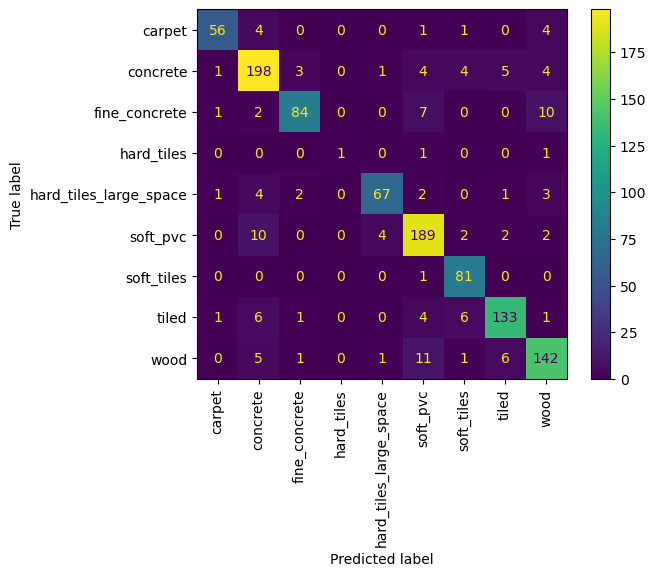

In [68]:
cmdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
cmdisp.plot(xticks_rotation='vertical')

## Part 4 ##

In [ ]:
df_data=pd.read_csv('')
df_surf=pd.read_csv('')

In [ ]:
for col in df_data.columns:
    df_final[col + '_mean'] = df_data.groupby(['series_id'])[col].mean()
    df_final[col + '_min'] = df_data.groupby(['series_id'])[col].min()
    df_final[col + '_max'] = df_data.groupby(['series_id'])[col].max()
    df_final[col + '_std'] = df_data.groupby(['series_id'])[col].std()
    
x_final = df_final.drop(["series_id_mean","series_id_min","series_id_max","series_id_std","measurement_number_mean","measurement_number_min","measurement_number_max","measurement_number_std"],axis=1)
x_final_scaled = scaler.transform(x_final) # i used the scaler from the training data in part 3
encoded surfaces = le.fit_transform(df_surf['surface'].tolist())
# rf3 = RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=800)
# rf3.fit(x_train_scaled, y_train) # fit to the training data from part 3
# y_pred_final = rf3.predict(x_final_scaled)

In [ ]:
#rf3 = RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=800)
 
y_pred_final = rf3.predict(x_final_scaled)
print(metrics.accuracy_score(encoded_surfaces, y_pred_final))
cm = metrics.confusion_matrix(encoded_surfaces, y_pred_final)
print(cm)

> I chose this model because it had the highest score when of the parameters I looked at using GridSearchCV. In my testing, it had an accuracy of 87.8% which was the highest I was able to achieve. |